In [2]:
import pandas as pd
import os
# 1 V3, 2 V8 3 V6 4 V4 
def read_data_file(tmp):
    columns = ['Steps','Total_Reward','ind','mind','discounted_reward','rate', 'Goods_Delivered']
    dft = pd.read_csv(tmp)
    dft['ind'] = dft[['Indivisual_A1_Steps','Indivisual_A2_Steps']].max(axis=1) #dft['Steps']-dft['Coop_Transport_Steps']
    dft['mind'] = dft[['Indivisual_A1_Steps','Indivisual_A2_Steps']].min(axis=1)
    dft['discounted_reward'] = dft["Total_Reward"]*pow(0.99,dft["Steps"])
    dft['1'] = 1
    dft['rate'] = dft["Coordinated_Steps"]/dft[['Coop_Transport_Steps','1']].max(axis=1)
    df = pd.DataFrame(columns=columns)
    df[columns] = dft[columns]
    return df

def read_data(data_dir):
    i = 0
    ldqn = {}
    for iii in range(7):
        ldqn[(iii)] = pd.DataFrame()

    for subdir, dirs, files in os.walk(data_dir):
        for file in files:
            filepath = subdir + os.sep + file 
            if 'stats' in filepath:
                # print("\nProcessing: " + file)
                df = read_data_file(filepath)
                ldqn[(0)][str(i)] = df['Steps']
                ldqn[(1)][str(i)] = df['ind']
                ldqn[(2)][str(i)] = df['discounted_reward']
                ldqn[(3)][str(i)] = df['rate']
                ldqn[(4)][str(i)] = df['Total_Reward']
                ldqn[(5)][str(i)] = df['mind']
                ldqn[(6)][str(i)] = df['Goods_Delivered']
                # print(df.columns)
                i = i + 1
    return ldqn

In [4]:
##boltzman distribution
def load_data_boltz(scenario):
    if scenario == 1:
        path = './Results/CMOTP_V3/IBLv_EpGreedy_IBL/'
        eibl = read_data(path)

        path = './Results/CMOTP_V3/IBLv_hysteretic'
        hibl = read_data(path)

        path = './Results/CMOTP_V3/IBLv_leniency/'
        libl = read_data(path)

        path = './Results/CMOTP_V3/ma_drl_hysteretic'
        hdqn = read_data(path)

        path = './Results/CMOTP_V3/ma_drl_leniency'
        ldqn = read_data(path)
        
        path = './Results/CMOTP_V3/ma_drl_none'
        dqn = read_data(path)
    if scenario == 2:
        path = './Results/CMOTP_V8/IBLv_EpGreedy_IBL/'
        eibl = read_data(path)

        path = './Results/CMOTP_V8/IBLv_hysteretic/'
        hibl = read_data(path)

        path = './Results/CMOTP_V8/IBLv_leniency/'
        libl = read_data(path)

        path = './Results/CMOTP_V8/ma_drl_hysteretic'
        hdqn = read_data(path)

        path = './Results/CMOTP_V8/ma_drl_leniency'
        ldqn = read_data(path)

        path = './Results/CMOTP_V8/ma_drl_none'
        dqn = read_data(path)
    if scenario == 3:
        path = './Results/CMOTP_V6/IBLv_EpGreedy_IBL/'
        eibl = read_data(path)

        path = './Results/CMOTP_V6/IBLv_hysteretic'
        hibl = read_data(path)

        path = './Results/CMOTP_V6/IBLv_leniency/'
        libl = read_data(path)

        path = './Results/CMOTP_V6/ma_drl_hysteretic'
        hdqn = read_data(path)

        path = './Results/CMOTP_V6/ma_drl_leniency'
        ldqn = read_data(path)

        path = './Results/CMOTP_V6/ma_drl_none'
        dqn = read_data(path)
    if scenario == 4:
        path = './Results/CMOTP_V4/IBLv_EpGreedy_IBL/'
        eibl = read_data(path)

        path = './Results/CMOTP_V4/IBLv_hysteretic'
        hibl = read_data(path)

        path = './Results/CMOTP_V4/IBLv_leniency/'
        libl = read_data(path)

        path = './Results/CMOTP_V4/ma_drl_hysteretic'
        hdqn = read_data(path)

        path = './Results/CMOTP_V4/ma_drl_leniency'
        ldqn = read_data(path)

        path = './Results/CMOTP_V4/ma_drl_none'
        dqn = read_data(path)

    return [eibl,hibl,libl, dqn, hdqn, ldqn]

In [10]:
from tabulate import tabulate
from texttable import Texttable

import latextable

rows = [['Rocket', 'Organisation', 'LEO Payload (Tonnes)', 'Maiden Flight'],
        ['Saturn V', 'NASA', '140', '1967'],
        ['Space Shuttle', 'NASA', '24.4', '1981'],
        ['Falcon 9 FT-Expended', 'SpaceX', '22.8', '2017'],
        ['Ariane 5 ECA', 'ESA', '21', '2002']]

rows = [['Metric', 'Greedy', 'Hysteretic', 'Lenient', 'Greedy', 'Hysteretic', 'Lenient']]
tmp1 = ['Optimal Zone','Step','Max Pickup Step','Diff. Pickup Step','Coordination Rate','Discounted Reward']

# #scenario 1
# tmp = load_data(1)
# tmp = load_data_boltz(1)
# a = []
# a.append(tmp1[0])
# for i in tmp:
#         a.append(round((i[(4)]==0.8).mean(axis=0).mean(),4))
# rows.append(a)
# for i,ii in zip([0, 1, 5, 3, 2],range(5)):
#         a = []
#         a.append(tmp1[ii+1])
#         # for d in tmp:
#         #         if ii<3:
#         #                 a.append(round(d[(i)][d[(4)]==0.8].mean(axis=0).mean(),2))
#         #         else:
#         #                 a.append(round(d[(i)][d[(4)]==0.8].mean(axis=0).mean(),4))
#         for d,iii in zip(tmp,range(6)):
#                 if ii == 3:
#                         a.append(round(d[(i)][d[(4)]==0.8].mean(axis=0).mean()*rows[1][iii+1],4))
#                 elif ii ==4:
#                         a.append(round(d[(i)][d[(4)]==0.8].mean(axis=0).mean()*rows[1][iii+1]/0.8,4))
#                 else:
#                         a.append(round(d[(i)][d[(4)]==0.8].mean(axis=0).mean(),4)) 
#         rows.append(a)

# #scenario 2
# tmp = load_data(2)
# tmp = load_data_boltz(2)
# a = []
# a.append(tmp1[0])
# for i in tmp:
#         a.append(round((i[(6)]=='2').mean(axis=0).mean(),4))

# rows.append(a)
# for i,ii in zip([0, 1, 5, 3, 2],range(5)):
#         a = []
#         a.append(tmp1[ii+1])
#         for d,iii in zip(tmp,range(6)):
#                 if ii == 3:
#                         # a.append(round(d[(i)][d[(6)]=='2'].mean(axis=0).mean()*rows[1][iii+1],4))
#                         a.append(round((d[(i)][d[(6)]=='2'].mean(axis=0)*(d[(6)]=='2').mean(axis=0)).mean(),4))
#                 elif ii ==4:
#                         # a.append(round(d[(i)][d[(6)]=='2'].mean(axis=0).mean()*rows[1][iii+1]/0.8,4))
#                         a.append(round((d[(i)][d[(6)]=='2'].mean(axis=0)*(d[(6)]=='2').mean(axis=0)).mean()/0.8,4))
#                 else:
#                         a.append(round(d[(i)][d[(6)]=='2'].mean(axis=0).mean(),4)) 
#                 # if ii<3:
#                 #         a.append(round(d[(i)][d[(6)]=='2'].mean(axis=0).mean(),2))
#                 # else:
#                 #         a.append(round(d[(i)][d[(6)]=='2'].mean(axis=0).mean(),4))
#         rows.append(a)

# #scenario 3
# tmp = load_data(3)
# tmp = load_data_boltz(3)
# a = []
# a.append(tmp1[0])
# for i in tmp:
#         a.append(round((i[(6)]=='1').mean(axis=0).mean(),4))

# rows.append(a)
# for i,ii in zip([0, 1, 5, 3, 2],range(5)):
#         a = []
#         a.append(tmp1[ii+1])
#         for d,iii in zip(tmp,range(6)):
#                 if ii == 3:
#                         a.append(round((d[(i)][d[(6)]=='1'].mean(axis=0)*(d[(6)]=='1').mean(axis=0)).mean(),4))
#                 elif ii ==4:
#                         a.append(round((d[(i)][d[(6)]=='1'].mean(axis=0)*(d[(6)]=='1').mean(axis=0)).mean()/3.2,4))
#                 else:
#                       a.append(round(d[(i)][d[(6)]=='1'].mean(axis=0).mean(),4))  
#                 # if ii<3:
#                 #         a.append(round(d[(i)][d[(6)]=='1'].mean(axis=0).mean(),2))
#                 # else:
#                 #         a.append(round(d[(i)][d[(6)]=='1'].mean(axis=0).mean(),4))
#         rows.append(a)


# #scenario 4
# tmp = load_data(4)
tmp = load_data_boltz(4)
a = []
a.append(tmp1[0])
for i,ii in zip(tmp,range(6)):
        if ii<4:
                op = i[(6)] == '1'
        else:
                op = ((i[(4)] == 32) | (i[(4)] == 0)) & (i[(6)] == True)
        # a.append(round((op).mean(axis=0).mean(),4))
        a.append((op).mean(axis=0).mean())
rows.append(a)
for i,ii in zip([0, 1, 5, 3, 2],range(5)):
        a = []
        a.append(tmp1[ii+1])
        # for i,ii in zip(tmp,range(6)):
        #         if ii<4:
        #                 op = i[(6)] == '1'
        #         else:
        #                 op = ((i[(4)] == 32) | (i[(4)] == 0)) & (i[(6)] == True)
        for d,iii in zip(tmp,range(6)):
                # op = (d[(4)] == 32) | (d[(5)]==0)
                if iii<4:
                        op = d[(6)] == '1'
                else:
                        op = ((d[(4)] == 32) | (d[(4)] == 0)) & (d[(6)] == True)
                if ii == 3:
                        # print(rows[1])
                        a.append((d[(i)][op].mean(axis=0)*op.mean(axis=0)).mean())
                elif ii == 4:
                        a.append((d[(i)][op].mean(axis=0)*op.mean(axis=0)).mean()/3.2)
                else:
                        a.append(d[(i)][op].mean(axis=0).mean())
                
                # if ii<3:
                #         a.append(round(d[(i)][op].mean(axis=0).mean(),2))
                # else:
                #         a.append(round(d[(i)][op].mean(axis=0).mean(),4))
        rows.append(a)
#################
table = Texttable()
table.set_cols_align(["l"] * 7)
table.set_deco(Texttable.HEADER | Texttable.VLINES)
table.add_rows(rows)

# print('Tabulate Table:')
# print(tabulate(rows, headers='firstrow'))

# print('\nTexttable Table:')
# print(table.draw())

# print('\nTabulate Latex:')
# print(tabulate(rows, headers='firstrow', tablefmt='latex'))

print('\nTexttable Latex:')
print(latextable.draw_latex(table, caption="A comparison of rocket features."))


Texttable Latex:
\begin{table}
	\begin{center}
		\begin{tabular}{l|l|l|l|l|l|l}
			Metric & Greedy & Hysteretic & Lenient & Greedy & Hysteretic & Lenient \\
			\hline
			Optimal Zone & 0.016 & 0.294 & 0.040 & 0.041 & 0.021 & 0.021 \\
			Step & 2793.874 & 2106.329 & 2533.865 & 2195.666 & 2847.490 & 2674.003 \\
			Max Pickup Step & 534.742 & 535.775 & 603.817 & 672.644 & 784.486 & 801.786 \\
			Diff. Pickup Step & 121.296 & 157.009 & 160.285 & 190.707 & 216.098 & 221.680 \\
			Coordination Rate & 0.004 & 0.263 & 0.019 & 0.008 & 0.004 & 0.004 \\
			Discounted Reward & 0.000 & 0.179 & 0.011 & 0.000 & 0.000 & 0.000 \\
		\end{tabular}
	\end{center}
	\caption{A comparison of rocket features.}
\end{table}


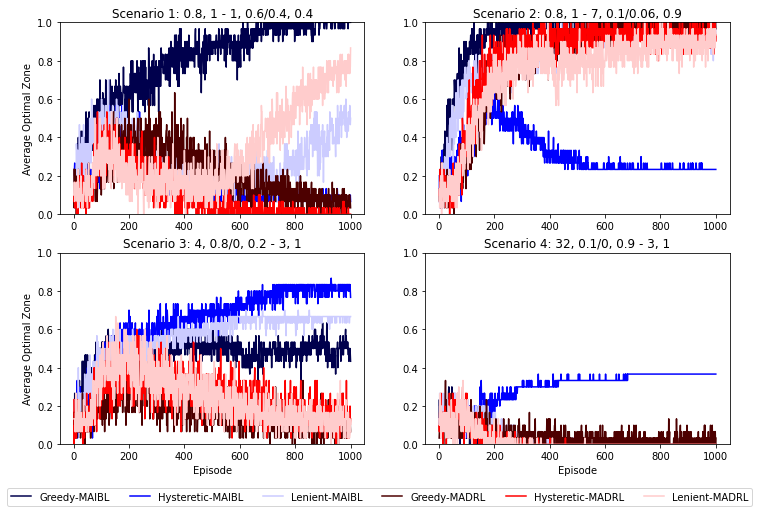

In [5]:
#Optinal zone

def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-1, 1, 100)
plt.plot(xs, 0 * xs, color='r', lw=3)
plt.plot(xs, xs**2, color=lighten_color('r', 0.4), lw=3)
plt.plot(xs, -xs**2, color=lighten_color('r', 1.6), lw=3)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

colors = [lighten_color('blue', 1.7), lighten_color('blue', 1), lighten_color('blue', 0.2),lighten_color('red', 1.7), lighten_color('red', 1),lighten_color('red', 0.2)]
labels = ['Greedy-MAIBL','Hysteretic-MAIBL','Lenient-MAIBL', 'Greedy-MADRL','Hysteretic-MADRL','Lenient-MADRL']
ylabels = ['Average Step','Average Maximum Pickup Step','Average Difference Pickup Step','Average Discounted Reward','Average Coordination Rate']
# tmp = load_data(1)
tmp = load_data_boltz(1)
x = list(range(1,1001))
plt.subplot(int("32"+str(1)))
for i,ii in zip(tmp,range(6)):
    op = i[(4)] == 0.8
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
plt.ylabel('Average Optimal Zone')
plt.title("Scenario 1: 0.8, 1 - 1, 0.6/0.4, 0.4")
plt.ylim([0,1])

tmp = load_data_boltz(2)
x = list(range(1,1001))
plt.subplot(int("32"+str(2)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '2'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')
plt.title("Scenario 2: 0.8, 1 - 7, 0.1/0.06, 0.9")
plt.ylim([0,1])

tmp = load_data_boltz(3)
x = list(range(1,1001))
plt.subplot(int("32"+str(3)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '1'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
plt.ylabel('Average Optimal Zone')
plt.title("Scenario 3: 4, 0.8/0, 0.2 - 3, 1")
plt.ylim([0,1])


# tmp = load_data(4)
tmp = load_data_boltz(4)
x = list(range(1,1001))
plt.subplot(int("32"+str(4)))
for i,ii in zip(tmp,range(6)):
    if ii<4:
        op = i[(6)] == '1'
    else:
        op = ((i[(4)] == 32) | (i[(4)] == 0)) & (i[(6)] == True)
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')

plt.title("Scenario 4: 32, 0.1/0, 0.9 - 3, 1")
plt.ylim([0,1])


plt.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.2), ncol=6)

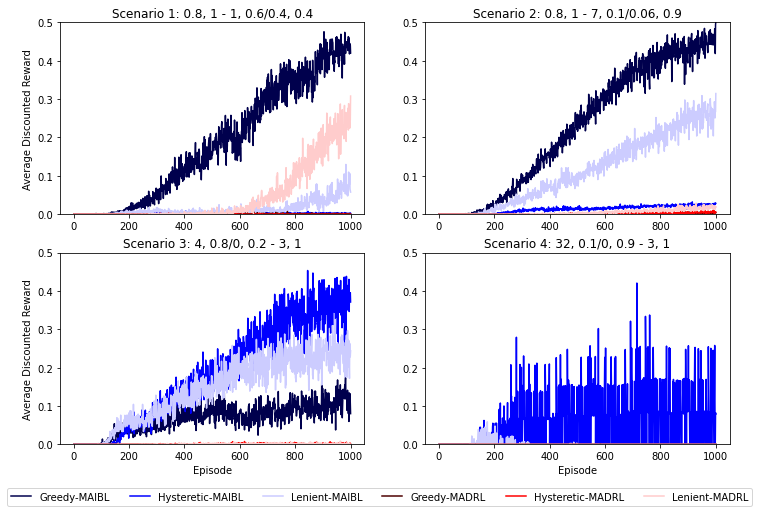

In [6]:
#discounted reward 
colors = [lighten_color('blue', 1.7), lighten_color('blue', 1), lighten_color('blue', 0.2),lighten_color('red', 1.7),lighten_color('red', 1), lighten_color('red', 0.2)]
labels = ['Greedy-MAIBL','Hysteretic-MAIBL','Lenient-MAIBL', 'Greedy-MADRL','Hysteretic-MADRL','Lenient-MADRL']
ylabels = ['Average Step','Average Maximum Pickup Step','Average Difference Pickup Step','Average Discounted Reward','Average Coordination Rate']
# tmp = load_data(1)
tmp = load_data_boltz(1)
x = list(range(1,1001))
h  = 2 # discounted reward 
plt.subplot(int("32"+str(1)))
for i,ii in zip(tmp,range(6)):
    op = i[(4)] == 0.8
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1)/0.8, color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
plt.ylabel('Average Discounted Reward')
plt.title("Scenario 1: 0.8, 1 - 1, 0.6/0.4, 0.4")
plt.ylim([0,0.5])

tmp = load_data_boltz(2)
x = list(range(1,1001))
plt.subplot(int("32"+str(2)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '2'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1)/0.8, color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')
plt.title("Scenario 2: 0.8, 1 - 7, 0.1/0.06, 0.9")
plt.ylim([0,0.5])

tmp = load_data_boltz(3)
x = list(range(1,1001))
plt.subplot(int("32"+str(3)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '1'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1)/3.2, color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
plt.ylabel('Average Discounted Reward')
plt.title("Scenario 3: 4, 0.8/0, 0.2 - 3, 1")
plt.ylim([0,0.5])


# tmp = load_data(4)
tmp = load_data_boltz(4)
x = list(range(1,1001))
plt.subplot(int("32"+str(4)))
for i,ii in zip(tmp,range(6)):
    if ii<4:
        op = i[(6)] == '1'
    else:
        op = ((i[(4)] == 32) | (i[(4)] == 0)) & (i[(6)] == True)
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1)/3.2, color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')

plt.title("Scenario 4: 32, 0.1/0, 0.9 - 3, 1")
plt.ylim([0,0.5])


plt.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.2), ncol=6)

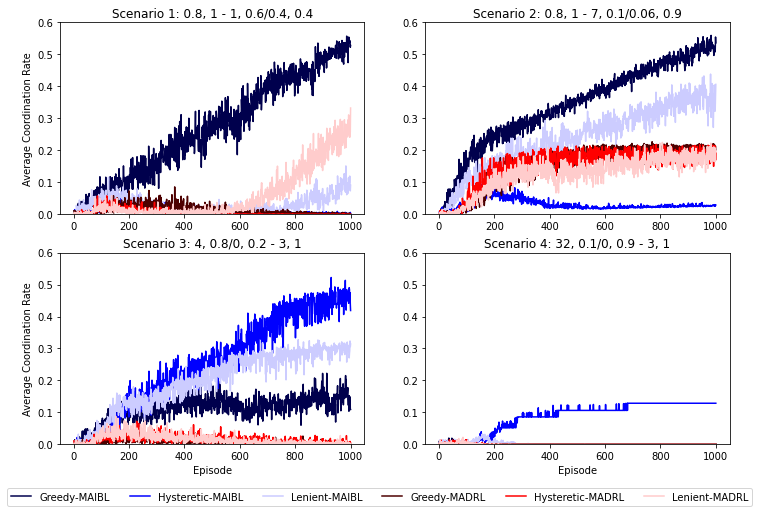

In [7]:
#Coordinate rate 
colors = [lighten_color('blue', 1.7), lighten_color('blue', 1), lighten_color('blue', 0.2),lighten_color('red', 1.7),lighten_color('red', 1), lighten_color('red', 0.2)]
labels = ['Greedy-MAIBL','Hysteretic-MAIBL','Lenient-MAIBL', 'Greedy-MADRL','Hysteretic-MADRL','Lenient-MADRL']
ylabels = ['Average Step','Average Maximum Pickup Step','Average Difference Pickup Step','Average Discounted Reward','Average Coordination Rate']
# tmp = load_data(1)
tmp = load_data_boltz(1)
x = list(range(1,1001))
h  = 3 # discounted reward 
plt.subplot(int("32"+str(1)))
for i,ii in zip(tmp,range(6)):
    op = i[(4)] == 0.8
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
plt.ylabel('Average Coordination Rate')
plt.title("Scenario 1: 0.8, 1 - 1, 0.6/0.4, 0.4")
plt.ylim([0,0.6])

tmp = load_data_boltz(2)
x = list(range(1,1001))
plt.subplot(int("32"+str(2)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '2'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
# plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')
plt.title("Scenario 2: 0.8, 1 - 7, 0.1/0.06, 0.9")
plt.ylim([0,0.6])

tmp = load_data_boltz(3)
x = list(range(1,1001))
plt.subplot(int("32"+str(3)))
for i,ii in zip(tmp,range(6)):
    op = i[(6)] == '1'
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
plt.ylabel('Average Coordination Rate')
plt.title("Scenario 3: 4, 0.8/0, 0.2 - 3, 1")
plt.ylim([0,0.6])


# tmp = load_data(4)
tmp = load_data_boltz(4)
x = list(range(1,1001))
plt.subplot(int("32"+str(4)))
for i,ii in zip(tmp,range(6)):
    if ii<3:
        op = i[(6)] == '1'
    else:
        op = ((i[(4)] == 32) | (i[(4)] == 0)) & (i[(6)] == True)
    # a.append(round((op).mean(axis=0).mean(),4))
    
    plt.plot(x, i[(h)][op].fillna(0).mean(axis=1)*op.mean(axis=1), color=colors[ii], markersize=2, linestyle='-', label=labels[ii])
plt.xlabel('Episode')
# plt.ylabel('Average Optimal Zone')

plt.title("Scenario 4: 32, 0.1/0, 0.9 - 3, 1")
plt.ylim([0,0.6])


plt.legend(loc='upper center', bbox_to_anchor=(-0.15, -0.2), ncol=6)